<a href="https://colab.research.google.com/github/pallavi-2000/pallavi2000/blob/main/Appliedf_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Reading the CSV file**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

data = pd.read_csv('CW1_data_202223.csv')

**Data Exploration**

In [4]:
print(data.shape)
data.describe()

(304887, 12)


,id,Age,HasDrivingLicense,RegionID,Switch,SalesChannelID,DaysSinceCreated,Result
count,304887.000000,274339.000000,274399.000000,274334.000000,152557.000000,304887.000000,304887.000000,304887.000000
mean,190594.098072,38.832561,0.997853,26.408892,0.458281,111.966591,154.272609,0.121970
std,110022.144283,15.504062,0.046281,13.213345,0.498258,54.230069,83.642389,0.327251
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000
25%,95342.500000,25.000000,1.000000,15.000000,0.000000,26.000000,82.000000,0.000000
50%,190639.000000,36.000000,1.000000,28.000000,0.000000,131.000000,154.000000,0.000000
75%,285785.500000,49.000000,1.000000,35.000000,1.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,163.000000,299.000000,1.000000


In [5]:
pd.set_option('display.max_columns', None, 'max_colwidth', None, 'display.expand_frame_repr', False) # print all columns in full, prevent line break

print('\n--- Show the number of data points (rows) and features (columns)---\n', data.shape)

print('\n---Information of the given dataset --- \n')
print(data.info())
print('\n ---Column names of the dataset --- \n', data.columns)



--- Show the number of data points (rows) and features (columns)---
 (304887, 12)

---Information of the given dataset --- 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304887 entries, 0 to 304886
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 304887 non-null  int64  
 1   Gender             274460 non-null  object 
 2   Age                274339 non-null  float64
 3   HasDrivingLicense  274399 non-null  float64
 4   RegionID           274334 non-null  float64
 5   Switch             152557 non-null  float64
 6   VehicleAge         274446 non-null  object 
 7   PastAccident       152422 non-null  object 
 8   AnnualPremium      304887 non-null  object 
 9   SalesChannelID     304887 non-null  int64  
 10  DaysSinceCreated   304887 non-null  int64  
 11  Result             304887 non-null  int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 27.9+ MB
None

 ---Colu

In [6]:
data=data.drop_duplicates()
data.shape

(304887, 12)

In [7]:
data.isna().sum()

id                        0
Gender                30427
Age                   30548
HasDrivingLicense     30488
RegionID              30553
Switch               152330
VehicleAge            30441
PastAccident         152465
AnnualPremium             0
SalesChannelID            0
DaysSinceCreated          0
Result                    0
dtype: int64

                         id       Age  HasDrivingLicense  RegionID    Switch  SalesChannelID  DaysSinceCreated    Result
id                 1.000000  0.003069          -0.002220 -0.001230 -0.000159       -0.003124          0.000209 -0.002525
Age                0.003069  1.000000          -0.080243  0.042637 -0.257237       -0.576164         -0.002235  0.111939
HasDrivingLicense -0.002220 -0.080243           1.000000 -0.002070  0.011623        0.043844         -0.001453  0.009580
RegionID          -0.001230  0.042637          -0.002070  1.000000 -0.018831       -0.042514         -0.004254  0.011969
Switch            -0.000159 -0.257237           0.011623 -0.018831  1.000000        0.219808          0.002117 -0.337895
SalesChannelID    -0.003124 -0.576164           0.043844 -0.042514  0.219808        1.000000         -0.000127 -0.137533
DaysSinceCreated   0.000209 -0.002235          -0.001453 -0.004254  0.002117       -0.000127          1.000000 -0.001025
Result            -0.002525  0.1

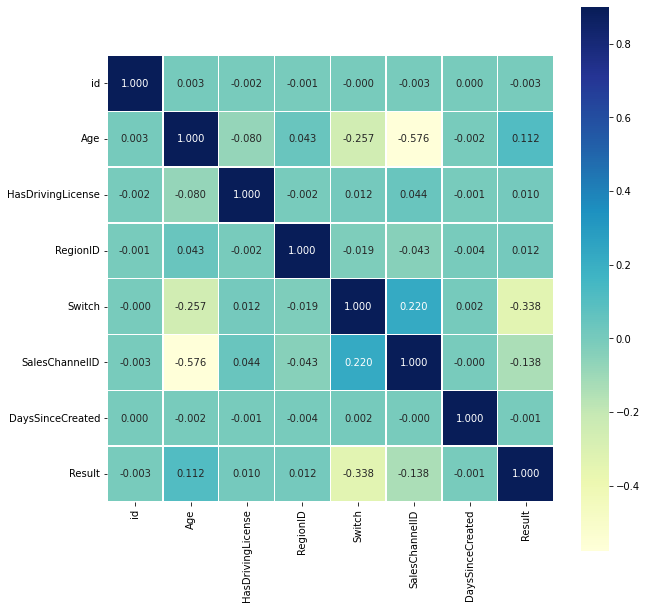

In [8]:
cr_matrix = data.corr()
print(cr_matrix)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(cr_matrix, vmax=0.9, square=True, annot=True, linewidths=0.3, cmap="YlGnBu", fmt=".3f")
plt.savefig('plot.jpg',dpi=300,bbox_inches='tight')

In [9]:
data['Result'].value_counts(normalize=True)


0    0.87803
1    0.12197
Name: Result, dtype: float64

Age   Result
20.0  0          4320
      1           123
21.0  0         11462
      1           409
22.0  0         14589
                ...  
82.0  1             1
83.0  0            10
      1             1
84.0  0             8
85.0  0             5
Name: Age, Length: 130, dtype: int64


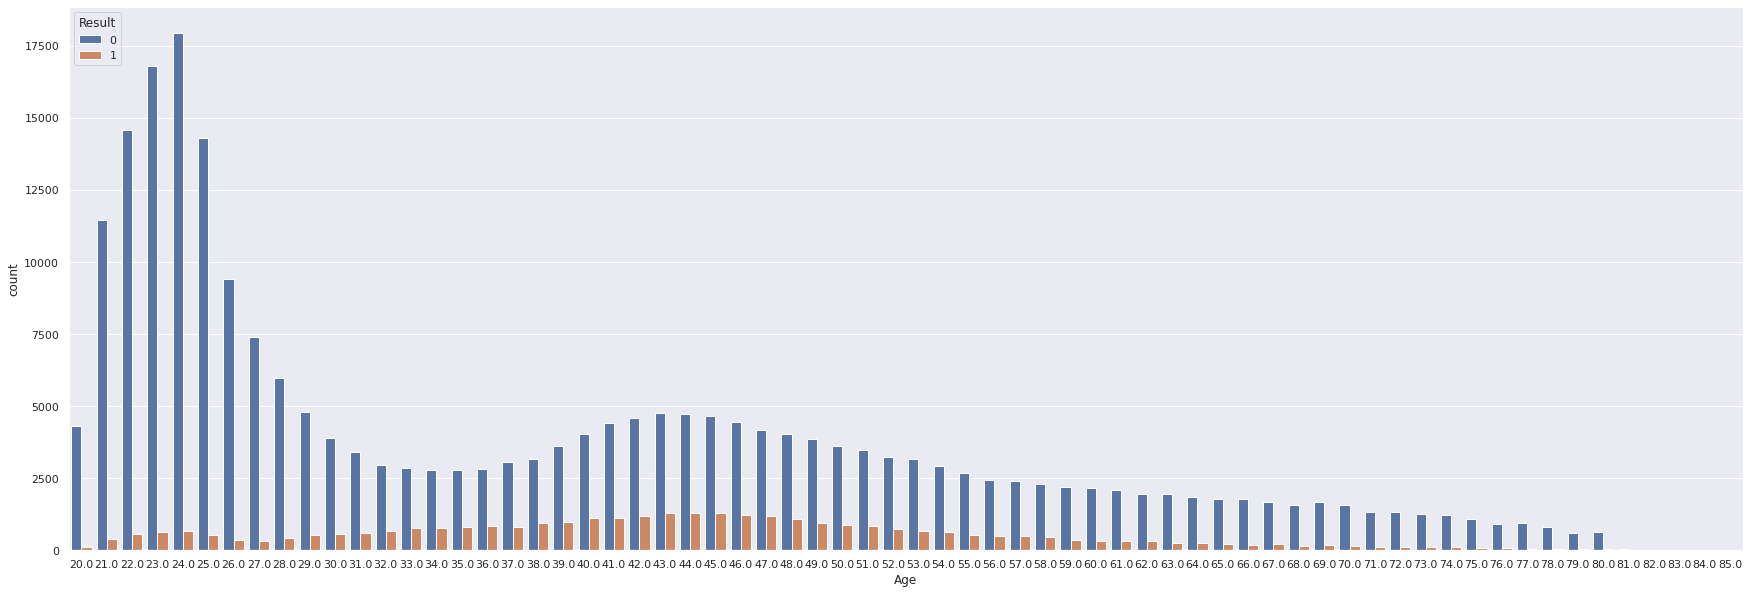

In [10]:
data['Age'].value_counts(normalize=True)
#data['Age'].decsribe
print(data.groupby(['Age','Result'])['Age'].count())
sns.set(rc={'figure.figsize':(30,10)})
sns.countplot(x=data['Age'],hue=data['Result'])
plt.savefig('age.jpg',dpi=300,bbox_inches='tight')



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


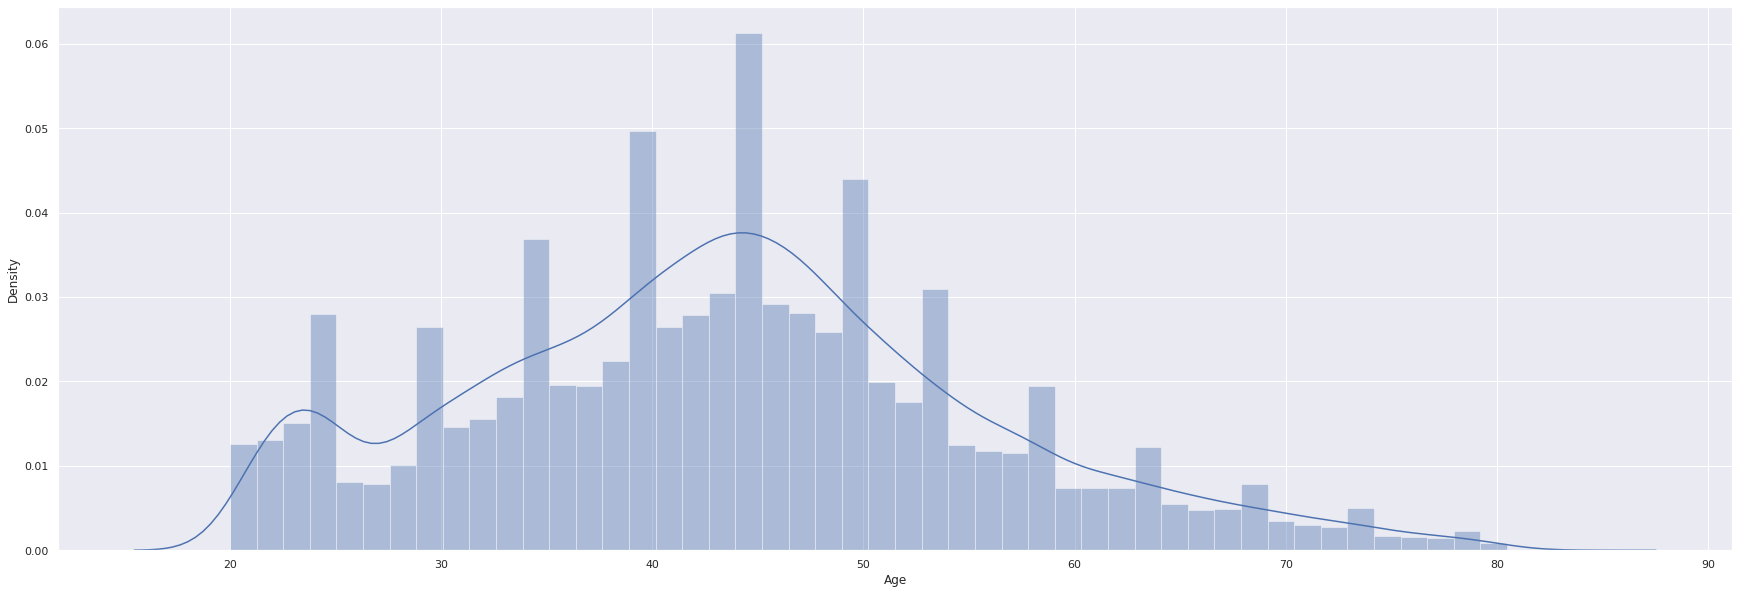

In [11]:
plot_age=(data.loc[data['Result'][data['Result']==1].index.values])['Age']
sns.distplot(plot_age)
plt.savefig('age2.jpg',dpi=300,bbox_inches='tight')

HasDrivingLicense  Result
0.0                0            557
                   1             32
1.0                0         240389
                   1          33421
Name: HasDrivingLicense, dtype: int64


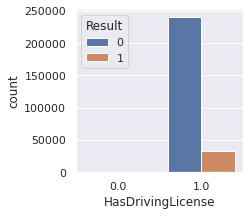

In [12]:
data['HasDrivingLicense'].value_counts(normalize=True)
print(data.groupby(['HasDrivingLicense','Result'])['HasDrivingLicense'].count())
sns.set(rc={'figure.figsize':(3,3)})
sns.countplot(x=data['HasDrivingLicense'],hue=data['Result'])
plt.savefig('drive.jpg',dpi=300,bbox_inches='tight')



RegionID  Result
0.0       0         1328
          1          123
1.0       0          666
          1           71
2.0       0         2658
                    ... 
50.0      1          450
51.0      0          111
          1           19
52.0      0          167
          1           26
Name: RegionID, Length: 106, dtype: int64


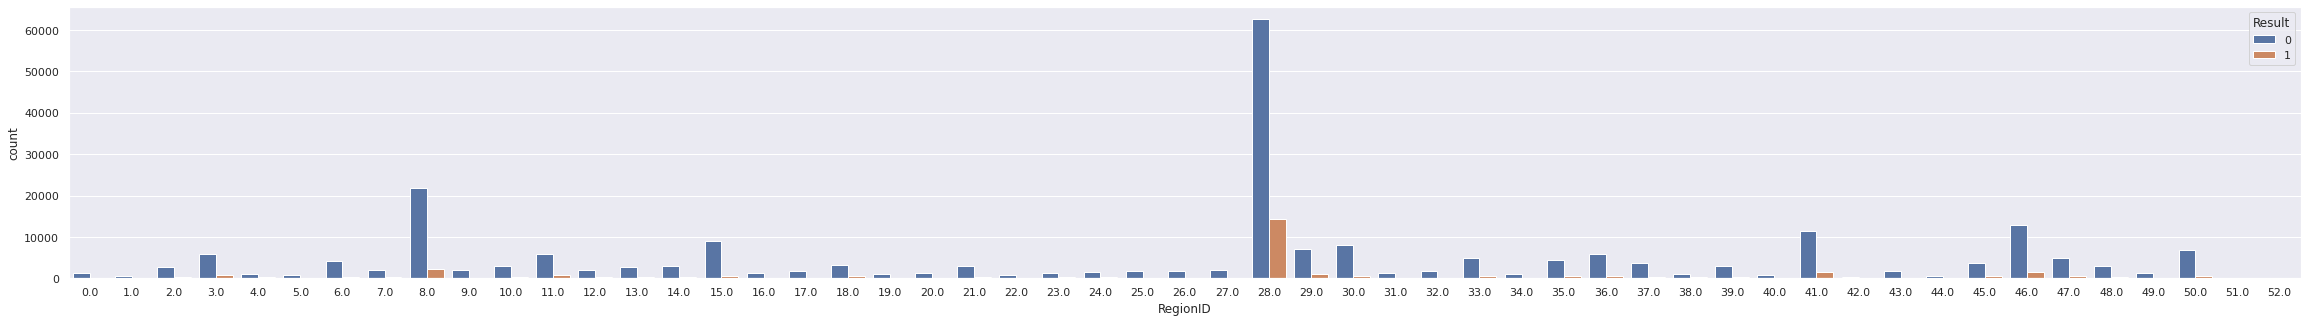

In [13]:
data['RegionID'].value_counts(normalize=True)
print(data.groupby(['RegionID','Result'])['RegionID'].count())
sns.set(rc={'figure.figsize':(40,5)})
sns.countplot(x=data['RegionID'],hue=data['Result'])
plt.savefig('reg.jpg',dpi=300,bbox_inches='tight')



Switch  Result
0.0     0         64321
        1         18322
1.0     0         69850
        1            64
Name: Switch, dtype: int64


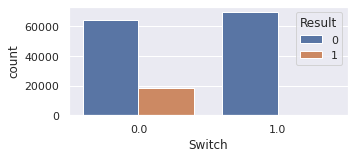

In [14]:
data['Switch'].value_counts(normalize=True)
print(data.groupby(['Switch','Result'])['Switch'].count())
sns.set(rc={'figure.figsize':(5,2)})
sns.countplot(x=data['Switch'],hue=data['Result'])

plt.savefig('switch.jpg',dpi=300,bbox_inches='tight')

In [15]:
data['SalesChannelID'].value_counts(normalize=True)

152    0.353472
26     0.209638
124    0.193934
160    0.056874
156    0.027735
         ...   
123    0.000003
75     0.000003
43     0.000003
144    0.000003
74     0.000003
Name: SalesChannelID, Length: 151, dtype: float64

In [16]:
print(data[data['SalesChannelID'] == 152]['Result'].value_counts(normalize=True))
print(data[data['SalesChannelID'] == 26]['Result'].value_counts(normalize=True))
print(data[data['SalesChannelID'] == 124]['Result'].value_counts(normalize=True))

0    0.971402
1    0.028598
Name: Result, dtype: float64
0    0.802303
1    0.197697
Name: Result, dtype: float64
0    0.812322
1    0.187678
Name: Result, dtype: float64


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


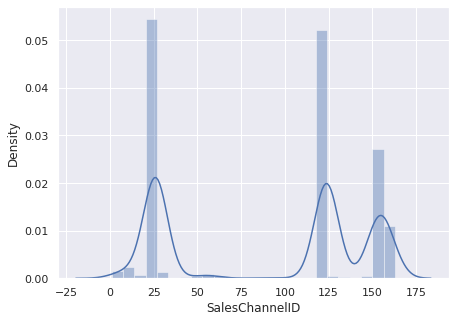

In [17]:
plot_sale=(data.loc[data['Result'][data['Result']==1].index.values])['SalesChannelID']
sns.set(rc={'figure.figsize':(7,5)})
sns.distplot(plot_sale)
plt.savefig('sales.jpg',dpi=300,bbox_inches='tight')

In [18]:
data['DaysSinceCreated'].value_counts(normalize=True)

103    0.003755
158    0.003729
24     0.003723
31     0.003690
256    0.003683
         ...   
279    0.003201
50     0.003198
12     0.003195
277    0.003195
89     0.003191
Name: DaysSinceCreated, Length: 290, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


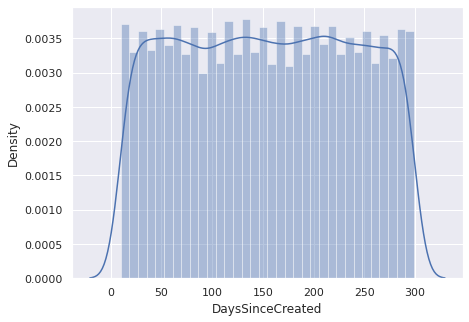

In [19]:
plot_days=(data.loc[data['Result'][data['Result']==1].index.values])['DaysSinceCreated']
sns.distplot(plot_days)

In [20]:
data["AnnualPremium"] = data["AnnualPremium"].replace('[\£,]', '', regex=True).astype(float)

AnnualPremium  Result
131.50         0         45181
               1          6782
304.90         0             1
383.50         0             1
490.80         1             1
                         ...  
24483.15       1             1
24755.30       0             1
25403.65       0             1
27008.25       0             3
               1             1
Name: AnnualPremium, Length: 64776, dtype: int64


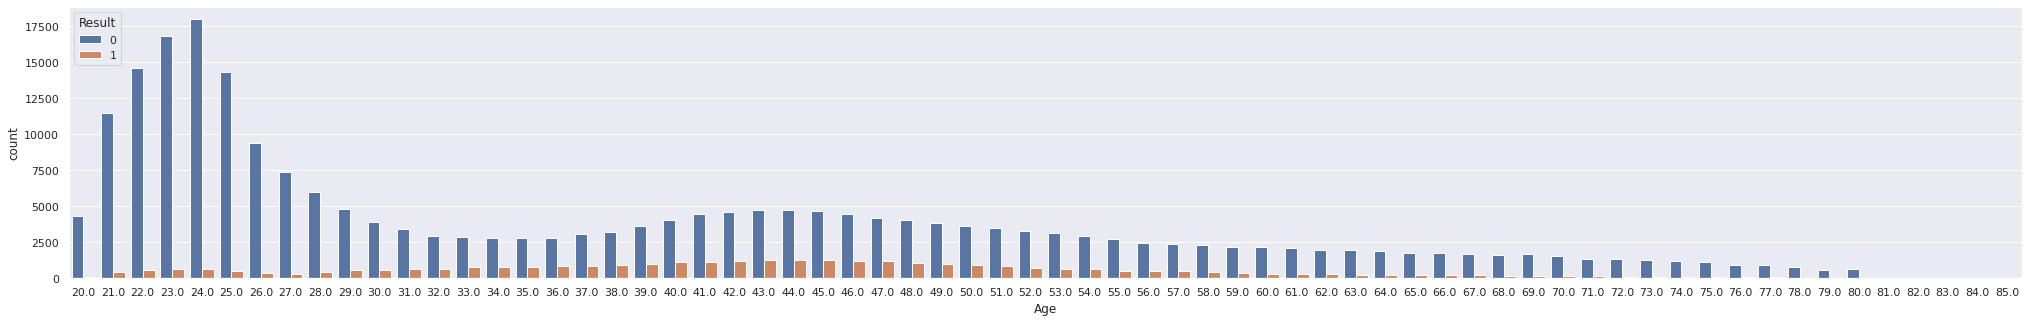

In [21]:
data['AnnualPremium'].value_counts(normalize=True)
print(data.groupby(['AnnualPremium','Result'])['AnnualPremium'].count())
sns.set(rc={'figure.figsize':(35,5)})
sns.countplot(x=data['Age'],hue=data['Result'])



**Data Preprocessing**

1. Dropping columns that have no significance like id
2. Normalizing Data
3. Imputing missing values
4. Encoding the data


In [22]:
new_df= data.drop('id',axis=1)

In [23]:
print(new_df['Result'].value_counts())

0    267700
1     37187
Name: Result, dtype: int64


The data looks imbalanced 

In [24]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
#from sklearn.compose import make_column_transformer


feature_gender = ['Gender']
gender_transformer =Pipeline(
    [
        ('impute_genger',SimpleImputer(strategy='most_frequent')),
        ('gender_encoder',OrdinalEncoder())        

    ]
)

feature_age = ['Age']
age_transformer =Pipeline(
    [
        ('impute_num',SimpleImputer(strategy='median')),
        ('num_scaler',MinMaxScaler())        
    ]
)

feature_license = ['HasDrivingLicense']
license_transformer =Pipeline(
    [
        ('impute_license',SimpleImputer(strategy='most_frequent')),
        ('license_enc',OrdinalEncoder())        
    ]
)

feature_region = ['RegionID']
region_transform= Pipeline(
    [
        ('impute_regionid',SimpleImputer(strategy='most_frequent')),
        ('region_scaler',MinMaxScaler())
    ]
)

feature_switch =['Switch']
switch_transform= Pipeline(
    [
        ('impute_switch',SimpleImputer(strategy='most_frequent')),
        ('license_enc',OrdinalEncoder())
    ]
)

feature_vage = ['VehicleAge']
vage_transformer =Pipeline(
    [
        ('impute_vage',SimpleImputer(strategy='most_frequent')),
        ('vage_encoder',OrdinalEncoder())             

    ]
)

feature_acc =['PastAccident']
acc_transform= Pipeline(
    [
        ('impute_acc',SimpleImputer(strategy='most_frequent')),
        ('acc_enc',OrdinalEncoder())
        
    ]
)

feature_premium= ['AnnualPremium']
premium_transform= Pipeline(
    [
        ('impute_premium',SimpleImputer(strategy='median')),
        ('premium_scale',MinMaxScaler())
    ]
)

feature_sales= ['SalesChannelID']
sales_transform= Pipeline(
    [
        ('impute_salesid',SimpleImputer(strategy='most_frequent')),
        #('sales_scale',MinMaxScaler())
    ]
)

feature_days =['DaysSinceCreated']
days_transform= Pipeline(
    [
       ('impute_days', SimpleImputer(strategy='median')),
       #('days_scale',MinMaxScaler())
    ]
)

preprocessor = ColumnTransformer(
    [
        ('gender',gender_transformer,feature_gender),
        ('age',age_transformer,feature_age),
        ('license',license_transformer,feature_license),
        ('regionid',region_transform,feature_region),
        ('switch',switch_transform,feature_switch),
        ('vage',vage_transformer,feature_vage),
        ('acc',acc_transform,feature_acc),
        ('premium',premium_transform,feature_premium),
        ('salesid',sales_transform,feature_sales),
        ('days',days_transform,feature_days)
    ],
    remainder = 'passthrough'
)

In [25]:
preprocessed_data = preprocessor.fit_transform(new_df)
data_frame_new= pd.DataFrame(preprocessed_data)
data_frame_new


,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.292308,1.0,0.288462,0.0,0.0,1.0,0.093531,55.0,227.0,1.0
1,1.0,0.276923,1.0,0.211538,0.0,0.0,1.0,0.037966,26.0,29.0,0.0
2,1.0,0.030769,1.0,0.576923,0.0,1.0,1.0,0.079414,152.0,166.0,0.0
3,0.0,0.046154,1.0,0.538462,0.0,1.0,1.0,0.049303,151.0,277.0,0.0
4,1.0,0.553846,1.0,0.923077,0.0,2.0,1.0,0.000000,154.0,155.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
304882,0.0,0.061538,1.0,0.692308,0.0,0.0,0.0,0.037105,152.0,287.0,0.0
304883,1.0,0.246154,1.0,0.673077,0.0,0.0,1.0,0.071915,124.0,298.0,0.0
304884,0.0,0.030769,1.0,0.038462,0.0,1.0,1.0,0.030188,152.0,76.0,0.0
304885,1.0,0.369231,1.0,0.615385,0.0,0.0,1.0,0.000000,156.0,51.0,0.0


In [26]:
data_frame_new.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000,304887.000000
mean,0.586506,0.285365,0.998068,0.510930,0.229311,0.464487,0.752544,0.051981,111.966591,154.272609,0.121970
std,0.492461,0.226637,0.043911,0.241210,0.420390,0.569619,0.431534,0.032099,54.230069,83.642389,0.327251
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000
25%,0.000000,0.076923,1.000000,0.307692,0.000000,0.000000,1.000000,0.040512,26.000000,82.000000,0.000000
50%,1.000000,0.246154,1.000000,0.538462,0.000000,0.000000,1.000000,0.054034,131.000000,154.000000,0.000000
75%,1.000000,0.430769,1.000000,0.634615,0.000000,1.000000,1.000000,0.068431,152.000000,227.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,163.000000,299.000000,1.000000


In [27]:
data_frame_1= data_frame_new[[0,1,2,3,4,5,6,7,8,9,10]]
data_frame_1.columns=['Gender','Age','HasDrivingLicense','RegionID','Switch','VehicleAge','PastAccident','AnnualPremium','SalesChannelID','DaysSinceCreated','Result']


                     Gender       Age  HasDrivingLicense  RegionID    Switch  VehicleAge  PastAccident  AnnualPremium  SalesChannelID  DaysSinceCreated    Result
Gender             1.000000  0.125823          -0.017223  0.001467 -0.043504   -0.095371      0.049844       0.003324       -0.101903         -0.002911  0.048104
Age                0.125823  1.000000          -0.072360  0.038006 -0.144257   -0.451413      0.147088       0.063610       -0.545629         -0.002163  0.106137
HasDrivingLicense -0.017223 -0.072360           1.000000 -0.001824  0.005164    0.026958     -0.007746      -0.013378        0.041541         -0.001393  0.009094
RegionID           0.001467  0.038006          -0.001824  1.000000 -0.009816   -0.023269      0.016271      -0.009554       -0.040209         -0.004033  0.011452
Switch            -0.043504 -0.144257           0.005164 -0.009816  1.000000    0.096630     -0.281908      -0.000561        0.131811          0.003476 -0.201777
VehicleAge        -0.095371 

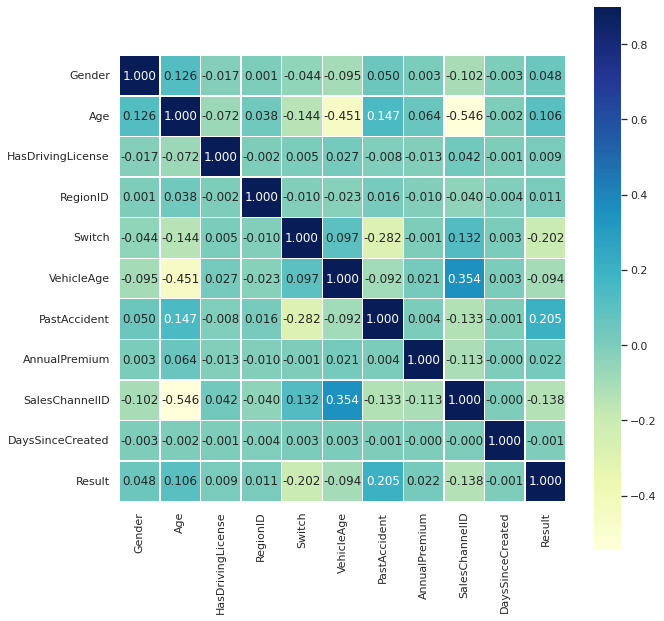

In [28]:
corr_matrix = data_frame_1.corr()
print(corr_matrix)

import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, vmax=0.9, square=True, annot=True, linewidths=0.3, cmap="YlGnBu", fmt=".3f")
plt.savefig('correlationplot.jpg',dpi=300,bbox_inches='tight')

Splitting Data

In [29]:
feature_cols=['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch','VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID','DaysSinceCreated']
res=['Result']
data_x = data_frame_1[feature_cols] # Features
data_y = data_frame_1[res]

In [30]:
print(data_x.head(5))


   Gender       Age  HasDrivingLicense  RegionID  Switch  VehicleAge  PastAccident  AnnualPremium  SalesChannelID  DaysSinceCreated
0     0.0  0.292308                1.0  0.288462     0.0         0.0           1.0       0.093531            55.0             227.0
1     1.0  0.276923                1.0  0.211538     0.0         0.0           1.0       0.037966            26.0              29.0
2     1.0  0.030769                1.0  0.576923     0.0         1.0           1.0       0.079414           152.0             166.0
3     0.0  0.046154                1.0  0.538462     0.0         1.0           1.0       0.049303           151.0             277.0
4     1.0  0.553846                1.0  0.923077     0.0         2.0           1.0       0.000000           154.0             155.0


In [31]:
data_y

,Result
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
304882,0.0
304883,0.0
304884,0.0
304885,0.0


In [32]:
data_frame_1.isna().sum()

Gender               0
Age                  0
HasDrivingLicense    0
RegionID             0
Switch               0
VehicleAge           0
PastAccident         0
AnnualPremium        0
SalesChannelID       0
DaysSinceCreated     0
Result               0
dtype: int64

In [33]:
from sklearn.model_selection import train_test_split

# 70% of the data for traingin, 30% for test, i.e., test_size=0.3
X_train, X_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.3, random_state=42) 
X_train

,Gender,Age,HasDrivingLicense,RegionID,Switch,VehicleAge,PastAccident,AnnualPremium,SalesChannelID,DaysSinceCreated
57639,1.0,0.369231,1.0,0.153846,0.0,0.0,1.0,0.060614,19.0,198.0
204173,1.0,0.630769,1.0,0.538462,1.0,0.0,1.0,0.000000,26.0,291.0
133839,1.0,0.261538,1.0,0.000000,0.0,0.0,1.0,0.000000,156.0,11.0
185020,1.0,0.430769,1.0,0.307692,0.0,0.0,1.0,0.000000,26.0,216.0
114042,0.0,0.400000,1.0,0.538462,0.0,0.0,1.0,0.091761,26.0,291.0
...,...,...,...,...,...,...,...,...,...,...
119879,1.0,0.338462,1.0,0.538462,0.0,0.0,1.0,0.183709,26.0,12.0
259178,1.0,0.046154,1.0,0.538462,0.0,1.0,1.0,0.053799,152.0,127.0
131932,1.0,0.323077,1.0,0.153846,0.0,0.0,1.0,0.034493,124.0,185.0
146867,1.0,0.030769,1.0,0.538462,0.0,1.0,1.0,0.000000,124.0,26.0


Balancing Imbalnced Dataset

In [34]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X_train, y_train)
X_test_smote,y_test_smote=sm.fit_resample(X_test,y_test)

In [35]:
y_test.info

<bound method DataFrame.info of         Result
21262      0.0
286648     0.0
8752       0.0
230171     0.0
89712      0.0
...        ...
219102     0.0
102127     0.0
152261     0.0
17505      0.0
41087      0.0

[91467 rows x 1 columns]>

Applying Models
1. Decesion Trees

In [36]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
tree_clf.fit(X_smote, y_smote)

DecisionTreeClassifier(max_depth=4, random_state=42)

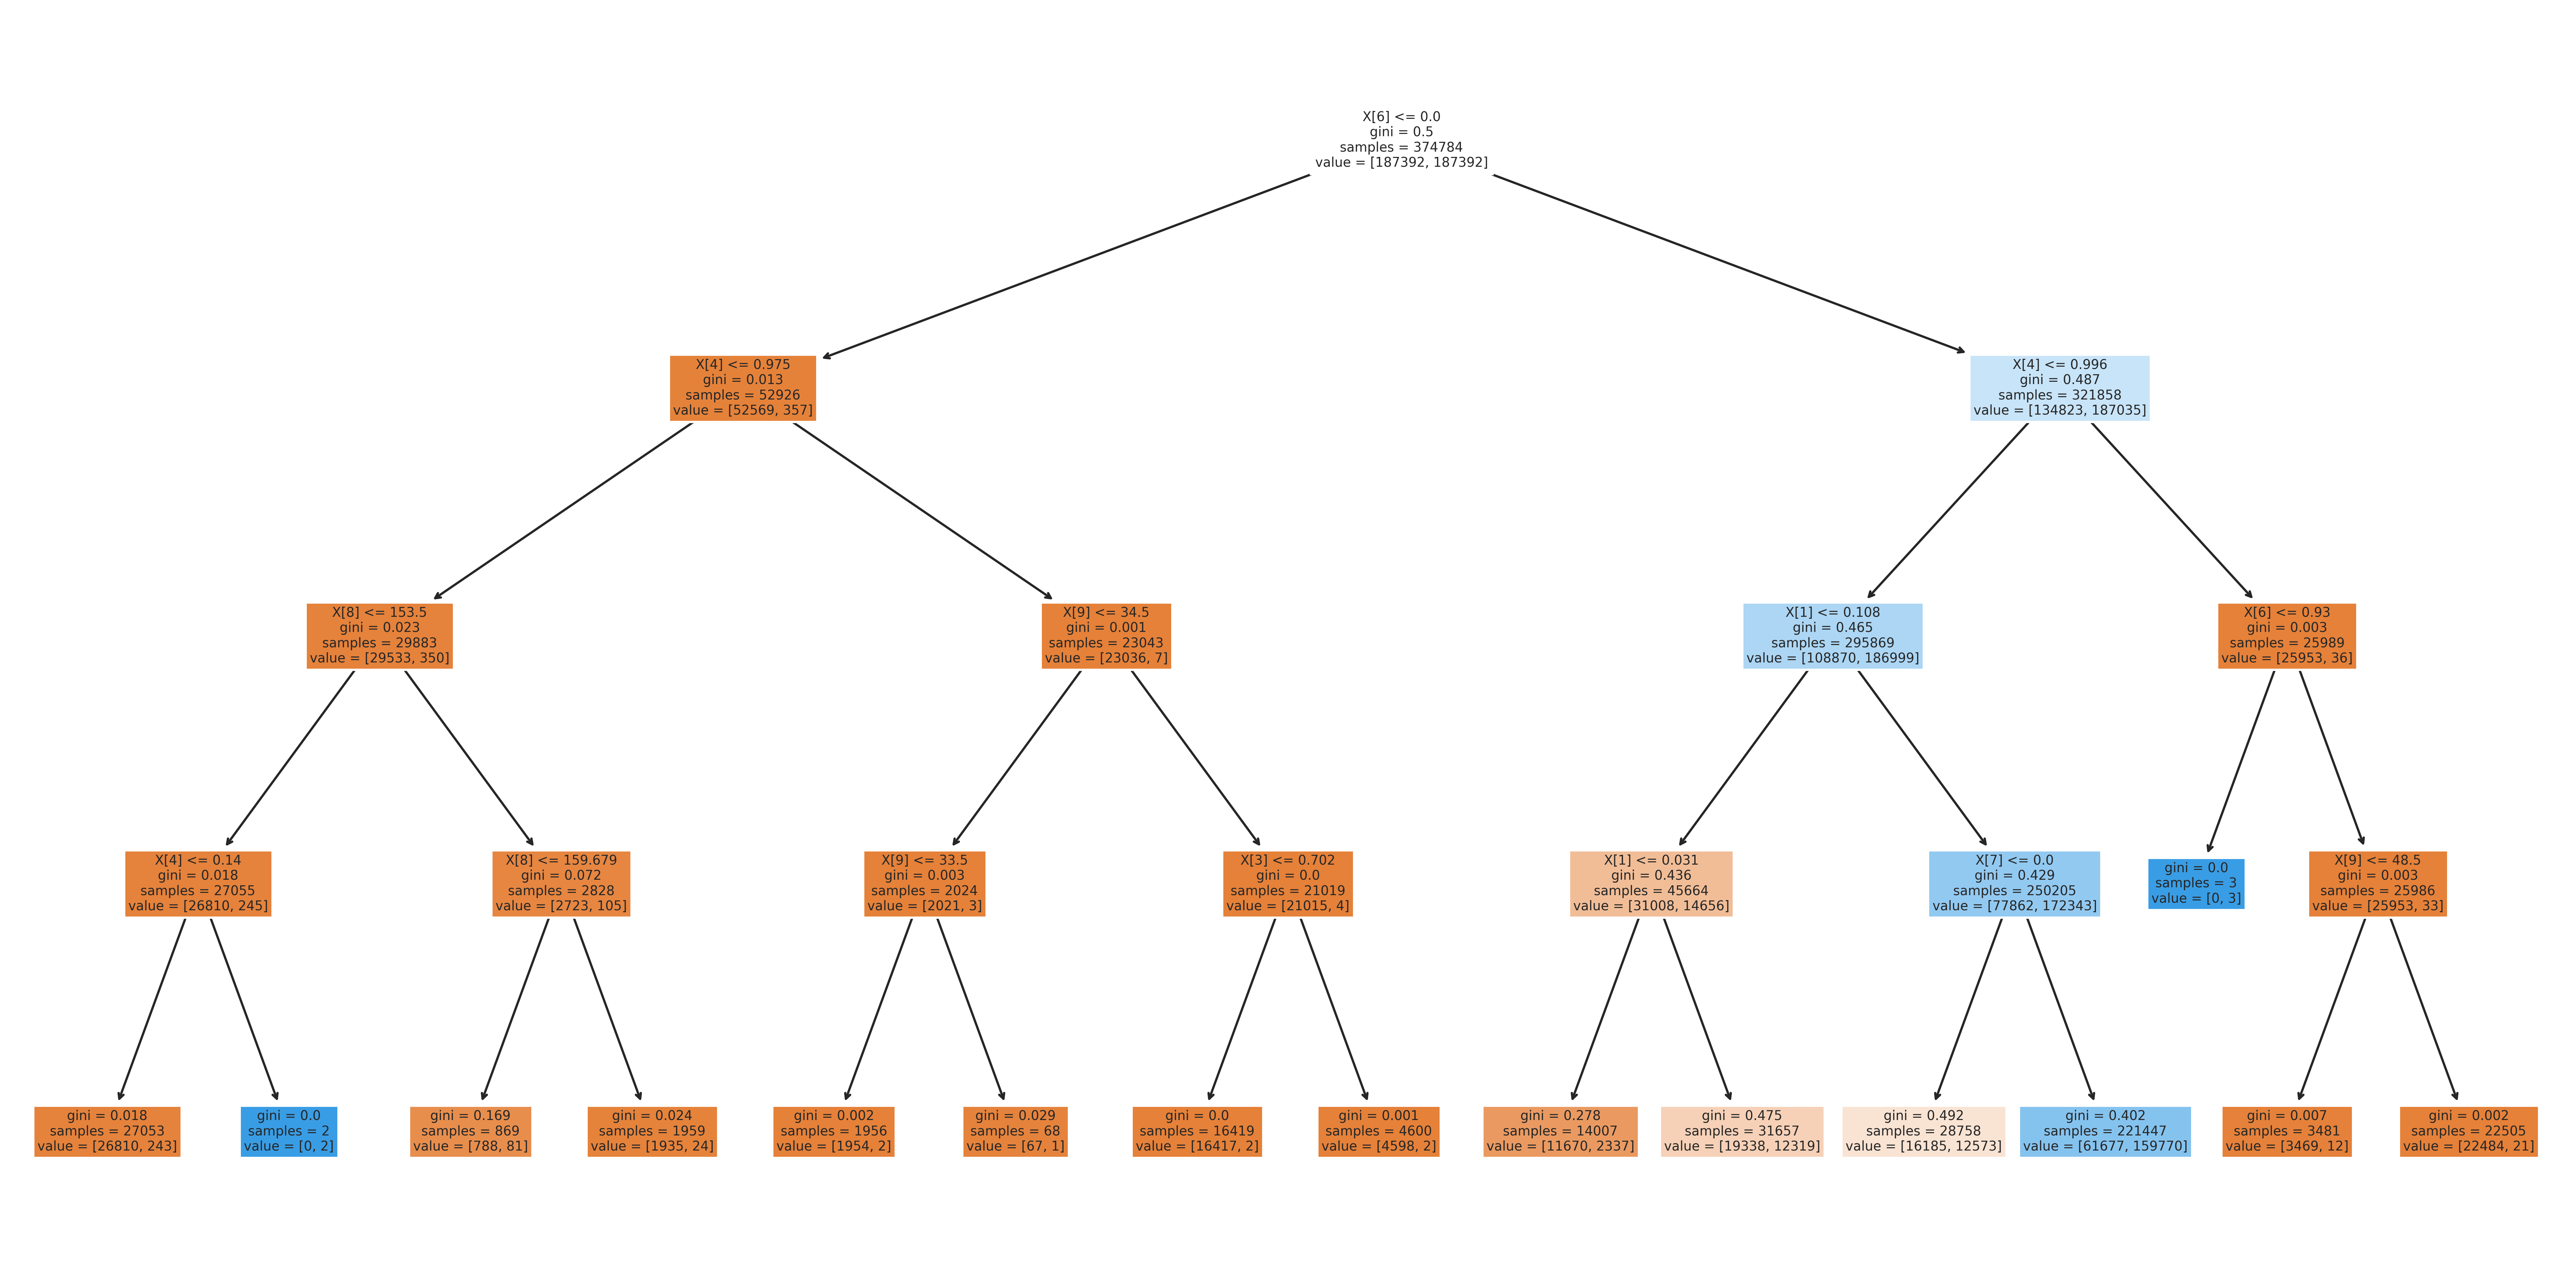

In [37]:
plt.figure(figsize=(20, 10),dpi=500) # Resize figure
plot_tree(tree_clf, filled=True)
plt.savefig('plot_tree1.jpg',dpi=300,bbox_inches='tight')

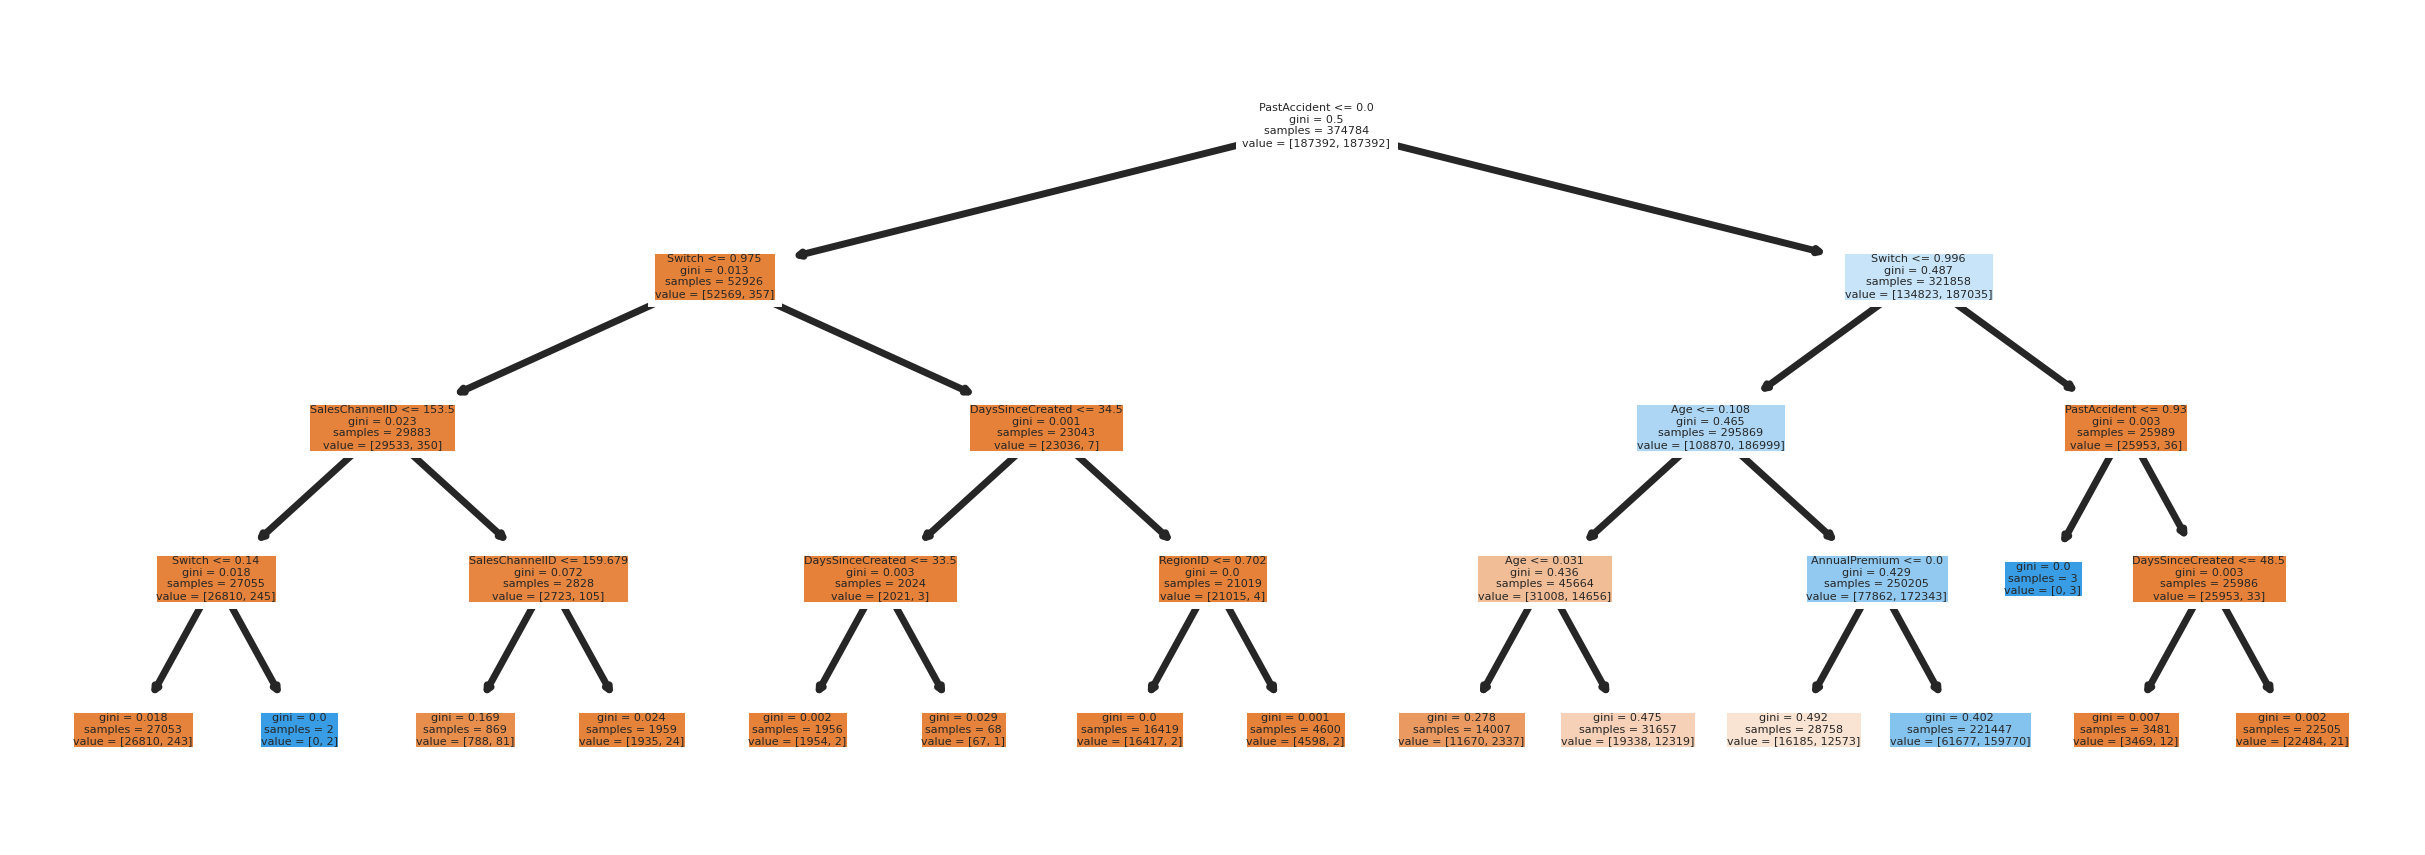

In [58]:
from sklearn import tree
fn= ['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch','VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID','DaysSinceCreated']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,2), dpi=500)
tree.plot_tree(tree_clf,feature_names = fn,filled = True);
fig.savefig('tree_imagename.jpg')

In [39]:
from sklearn.metrics import accuracy_score
ypred=tree_clf.predict(X_test_smote)
ypred
acc1 = accuracy_score(y_test_smote, ypred)

print(acc1)

0.7625890322259302


In [40]:
ypred

array([0., 1., 0., ..., 1., 1., 1.])

In [41]:
from sklearn.metrics import precision_score,recall_score
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",precision_score(y_test_smote, ypred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",recall_score(y_test_smote, ypred))

Precision: 0.7216336654475134
Recall: 0.8549833142401754


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


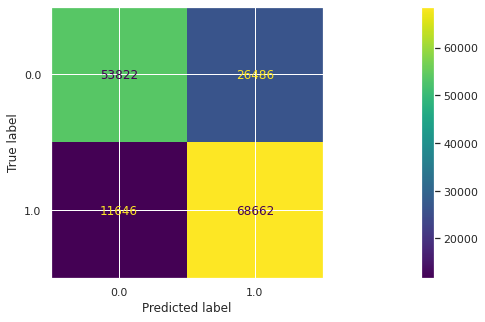

In [42]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(tree_clf,X_test_smote,y_test_smote)
plt.savefig('confusionDecesion.jpg',dpi=300,bbox_inches='tight')

In [43]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500, 
    max_samples=100, bootstrap=True, random_state=42)
bag_clf.fit(X_smote, y_smote.values.ravel())
y_pred = bag_clf.predict(X_test_smote)

In [44]:
# printing classification accuracy from above bagging ensemble of 500 decision trees
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_smote, y_pred))


0.7811239228968472


In [45]:
print("Accuracy Improved after Bagging")

Accuracy Improved after Bagging


In [46]:
# show classification accuracy of a single decision tree for comparison
tree_clf3 = DecisionTreeClassifier(random_state=42)
tree_clf3.fit(X_smote, y_smote)
y_pred_tree = tree_clf3.predict(X_test_smote)
print(accuracy_score(y_test_smote, y_pred_tree))

0.8697452308611845


In [47]:
print(classification_report(y_test_smote,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.76     80308
         1.0       0.75      0.85      0.80     80308

    accuracy                           0.78    160616
   macro avg       0.79      0.78      0.78    160616
weighted avg       0.79      0.78      0.78    160616



**Logistic Regression**

Functions for visualisation of data and decision boundary

In [48]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(solver='lbfgs',max_iter=800)

# fit the model with data
logreg.fit(X_smote, y_smote.values.ravel())

ypred = logreg.predict(X_test_smote)

In [49]:
# import the metrics class
from sklearn import metrics

cnf_matrix2 = metrics.confusion_matrix(y_test_smote, ypred)
cnf_matrix2

array([[40659, 39649],
       [ 3971, 76337]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


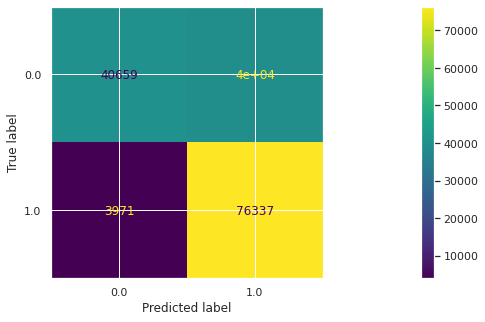

In [50]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(logreg,X_test_smote,y_test_smote)
plt.savefig('confusionLogistic.jpg',dpi=300,bbox_inches='tight')


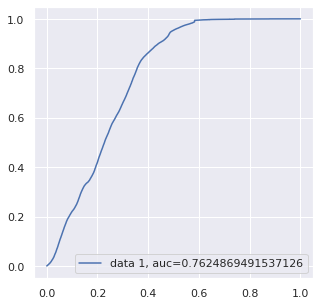

<Figure size 2520x360 with 0 Axes>

In [51]:
y_pred_proba = logreg.predict_proba(X_test_smote)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test_smote,  y_pred_proba)
auc = metrics.roc_auc_score(y_test_smote, y_pred_proba)
plt.figure(figsize=(5, 5)) # Resize figure
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()
plt.savefig('roc.jpg',dpi=300,bbox_inches='tight')

In [52]:
print(classification_report(y_test_smote,y_pred))

              precision    recall  f1-score   support

         0.0       0.83      0.71      0.76     80308
         1.0       0.75      0.85      0.80     80308

    accuracy                           0.78    160616
   macro avg       0.79      0.78      0.78    160616
weighted avg       0.79      0.78      0.78    160616



In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

log_clf = LogisticRegression(solver="lbfgs", random_state=42)       # logistic regression classifier
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42) # random forest classifier

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf)],
    voting='hard')


In [64]:
y = y_smote.iloc[:,-1:].values.flatten()
voting_clf.fit(X_smote, y_smote.values.ravel())

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf',
                              RandomForestClassifier(n_estimators=500,
                                                     random_state=42))])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, voting_clf):
    clf.fit(X_smote,y_smote.values.ravel())
    y_pred = clf.predict(X_test_smote)
    print(clf.__class__.__name__, accuracy_score(y_test_smote, y_pred))

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression 0.7197913034815958
RandomForestClassifier 0.8753362056084076


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Random Forests

In [60]:
from sklearn.ensemble import BaggingClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, random_state=42)

In [61]:
bag_clf.fit(X_smote,y_smote.values.ravel())
y_pred = bag_clf.predict(X_test_smote)

In [62]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, random_state=42)
rnd_clf.fit(X_smote, y_smote.values.ravel())

y_pred_rf = rnd_clf.predict(X_test_smote)

In [63]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
confusion_matrix(y_test_smote,y_pred_rf)

array([[57671, 22637],
       [ 8722, 71586]])

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


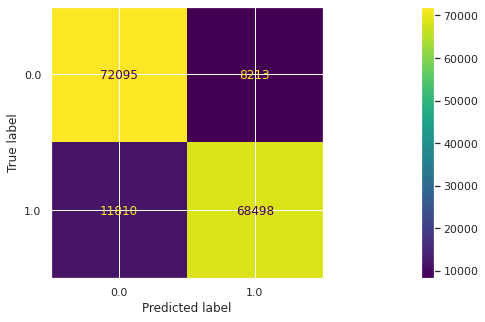

In [69]:
from sklearn.metrics._plot.confusion_matrix import plot_confusion_matrix
plot_confusion_matrix(rnd_clf,X_test_smote,y_test_smote)
plt.savefig('confusionrandom.jpg',dpi=300,bbox_inches='tight')

In [65]:
from sklearn.metrics import accuracy_score

print('RF accuracy: ', accuracy_score(y_test_smote, y_pred_rf))
print('Bagging accuracy: ', accuracy_score(y_test_smote, y_pred))

print("\nRate of the same prediction between RF adn Bagging classifiers: ", np.sum(y_pred == y_pred_rf) / len(y_pred) )  # almost identical predictions

RF accuracy:  0.8047579319619466
Bagging accuracy:  0.7815659710116053

Rate of the same prediction between RF adn Bagging classifiers:  0.9385677641081835


In [66]:
rnd_clf = RandomForestClassifier(n_estimators=500, random_state=42)
rnd_clf.fit(X_smote,y_smote.values.ravel())
fn= ['Gender', 'Age', 'HasDrivingLicense', 'RegionID', 'Switch','VehicleAge', 'PastAccident', 'AnnualPremium', 'SalesChannelID','DaysSinceCreated']
for name, score in zip(data_frame_1[fn], rnd_clf.feature_importances_):
    print(name, score)

Gender 0.027126117203478944
Age 0.24236575261098317
HasDrivingLicense 0.0006312383127492664
RegionID 0.1104050448129801
Switch 0.09602724455755136
VehicleAge 0.04447380755419336
PastAccident 0.11816128165368671
AnnualPremium 0.14816529284720187
SalesChannelID 0.07892226013961384
DaysSinceCreated 0.13372196030756126


In [67]:
print(classification_report(y_test_smote,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.87      0.72      0.79     80308
         1.0       0.76      0.89      0.82     80308

    accuracy                           0.80    160616
   macro avg       0.81      0.80      0.80    160616
weighted avg       0.81      0.80      0.80    160616

